# Introdution


## part-2


## Import Libraries

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from IPython.display import Image

## Import the points

In [ ]:
x = np.array([-4.4, -3.7, -3.1, -2.4, -1.9, -1.4, -0.8, 0, 0.4, 1, 2, 2.7, 3.5, 4.4, 5, 6, 6.5, 7, 7.6, 8, 8.6, 9, 9.6, 10.1, 10.7, 11 ])
y = np.array([5.4, 5.2, 5, 5.6, 5.4, 5.6, 5.8, 5.9, 6, 6, 5.9, 6, 7, 7.2, 7.3, 7.3, 7.2, 7.2, 7, 6.9, 6.7, 6.5, 6.4, 6.6, 6.6, 6.4])
x = x.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(16,16,8,8), activation='relu', solver='lbfgs', random_state=52, max_iter=254)
mlp.fit(X_train, y_train)
train_score1 = mlp.score(X_train, y_train)
test_score1 = mlp.score(X_test, y_test)
print(f"Training R2 Score: {train_score1}")
print(f"Testing R2 Score: {test_score1}")

Training R2 Score: 0.9954881444650907
Testing R2 Score: 0.7405339944546645


In [ ]:
x_values = np.linspace(-5, 11, 100).reshape(-1, 1)
y_pred = mlp.predict(x_values)

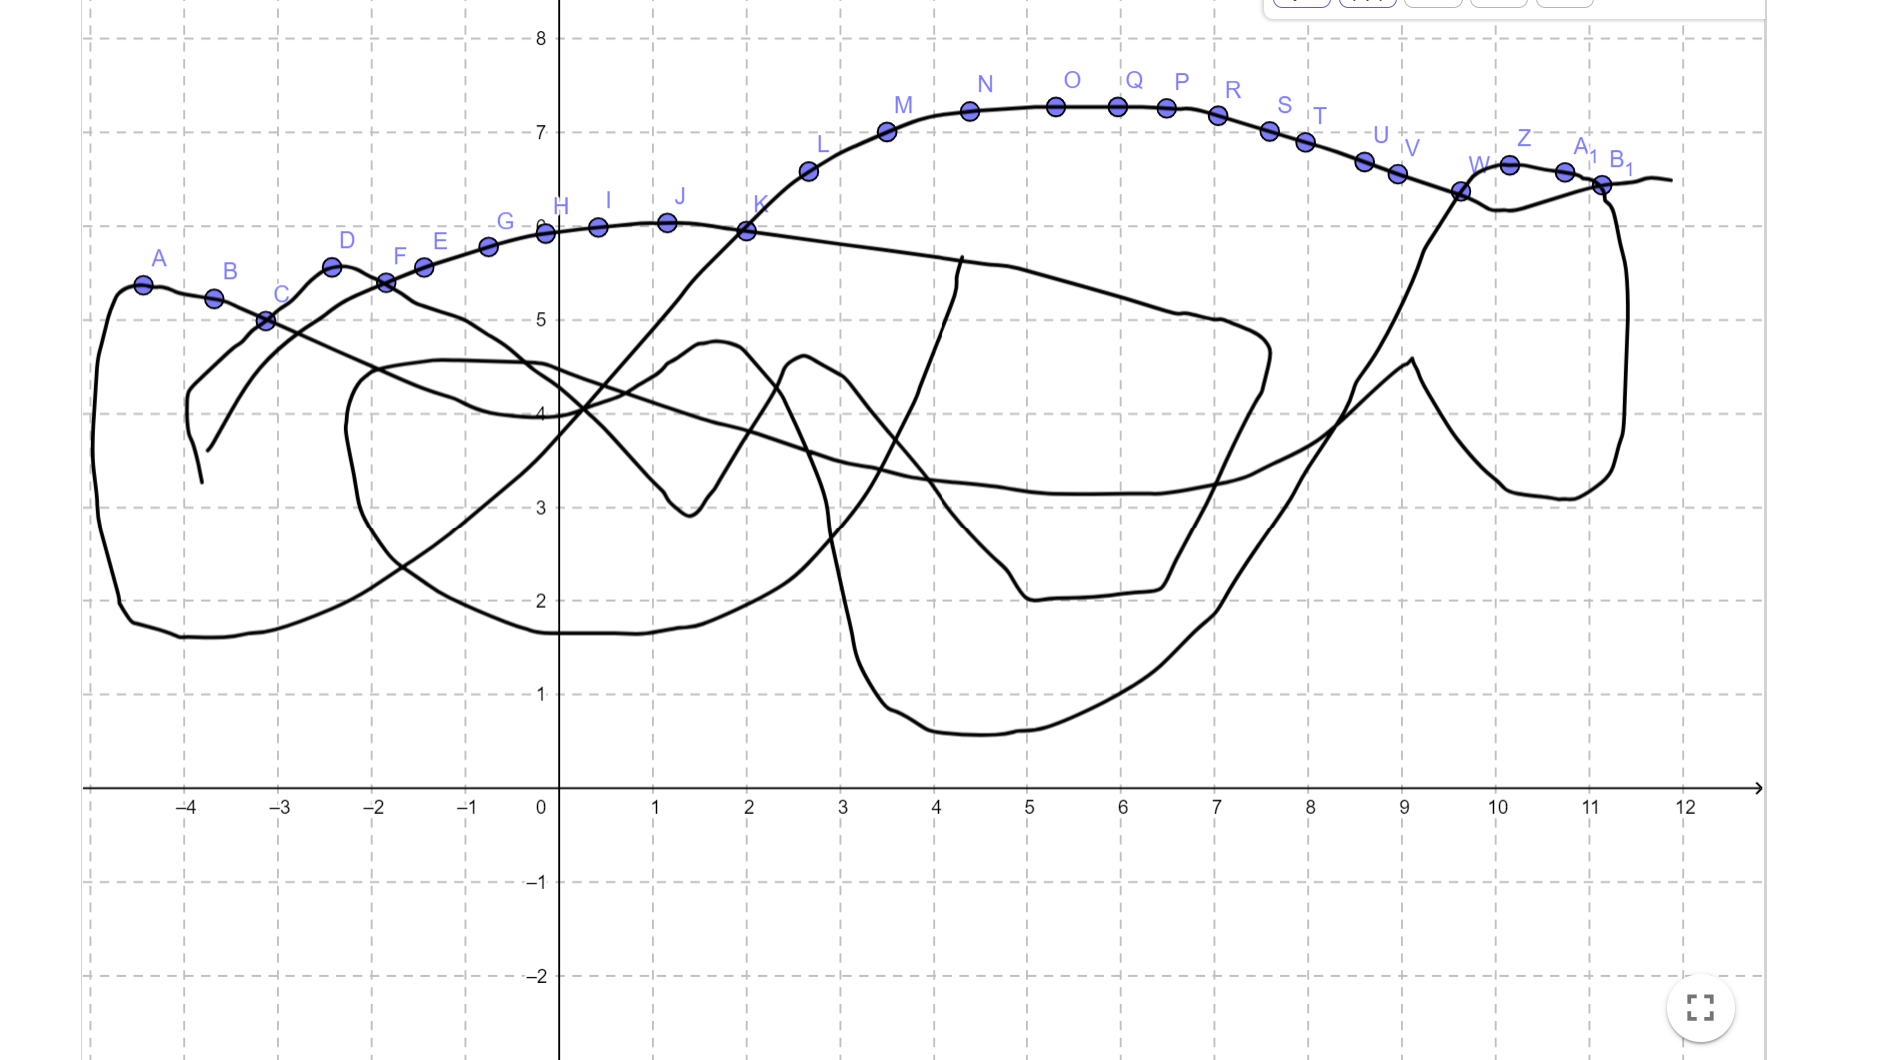

In [5]:
Image('/content/MY_ANGER.png', width=500, height=300)

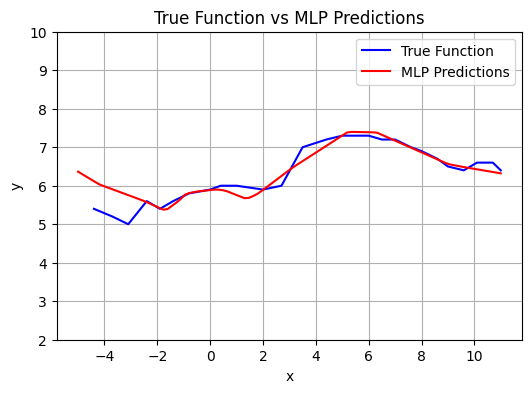

In [ ]:
# Plot true function vs predictions
plt.figure(figsize=(6,4))
plt.plot(x, y, label='True Function', color='blue')
plt.plot(x_values, y_pred, label='MLP Predictions', color='red')
plt.title('True Function vs MLP Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(2, 10)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
x = np.array([-4.4, -3.7, -3.1, -2.4, -1.9, -1.4, -0.8, 0, 0.4, 1, 2, 2.7, 3.5, 4.4, 5, 6, 6.5, 7, 7.6, 8, 8.6, 9, 9.6, 10.1, 10.7, 11 ])
y = np.array([5.4, 5.2, 5, 5.6, 5.4, 5.6, 5.8, 5.9, 6, 6, 5.9, 6, 7, 7.2, 7.3, 7.3, 7.2, 7.2, 7, 6.9, 6.7, 6.5, 6.4, 6.6, 6.6, 6.4])
x = x.reshape(-1,1)

## Add Noise to data


In [ ]:
y_train_noisy = y_train + np.round(np.random.normal(-0.1, 0.1, y_train.shape),1)

### Identify & Remove outliers

In [ ]:
outlier_threshold = 2.5  # Adjust the threshold as needed
mean_y = np.mean(y_train)
std_y = np.std(y_train)
outliers = np.abs((y_train - mean_y) / std_y) > outlier_threshold
X_train_clean = X_train[~outliers]
y_train_clean = y_train[~outliers]

### Create MLP Regrosser

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(16,8,8), activation='relu', solver='lbfgs', random_state=52, max_iter=504)

### Train MLP Regressor with noisy data

In [ ]:

mlp.fit(X_train, y_train_noisy)
train_score1 = mlp.score(X_train, y_train_noisy)
test_score1 = mlp.score(X_test, y_test)
print(f"Training R2 Score: {train_score1}")
print(f"Testing R2 Score: {test_score1}")

Training R2 Score: 0.9709793954783051
Testing R2 Score: 0.6696781996056302
Training R2 Score: 0.9714279674577645
Testing R2 Score: 0.8153012729823793


### Train MLP Regressor with Clean Data

In [ ]:
mlp.fit(X_train, y_train_clean)
train_score1 = mlp.score(X_train, y_train_clean)
test_score1 = mlp.score(X_test, y_test)
print(f"Training R2 Score: {train_score1}")
print(f"Testing R2 Score: {test_score1}")

### Generate Prediction for Plotting

In [ ]:
x_values = np.linspace(-5, 11, 20).reshape(-1, 1)
y_pred = mlp.predict(x_values)
X_train_sorted = np.sort(X_train, axis=0)

# for idx, (a, b, c) in enumerate(zip(X_train, y_train_noisy, y_train)):
#     print(f"[{a}, {b}, {c}]")

Plot true Function & Prediction & Noise

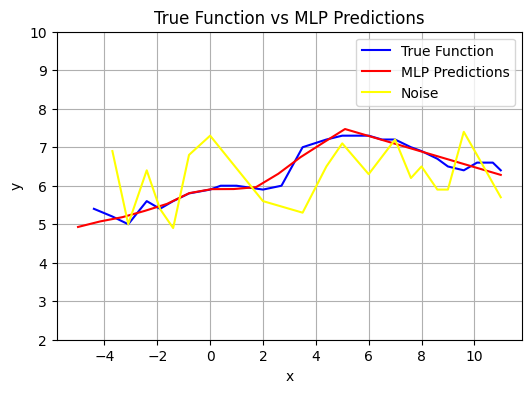

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(x, y, label='True Function', color='blue')
plt.plot(x_values, y_pred, label='MLP Predictions', color='red')
plt.plot(X_train_sorted, y_train_noisy, label='Noise', color='yellow')
plt.title('True Function vs MLP Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(2,10)
plt.grid(True)
plt.legend()
plt.show()